In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()


Saving phishing.csv to phishing.csv


In [3]:
df = pd.read_csv("phishing.csv")

In [4]:
print("📊 Dataset preview:")
print(df.head())

📊 Dataset preview:
  rec_id                                                url  \
0      1                 http://intego3.info/EXEL/index.php   
1      2           https://www.mathopenref.com/segment.html   
2      3   https://www.computerhope.com/issues/ch000254.htm   
3      4  https://www.investopedia.com/terms/n/next-elev...   
4      5                  https://jobs.emss.org.uk/lcc.aspx   

                 website  result         created_date  
0  1613573972338075.html     1.0  2021-02-17 20:29:32  
1  1635698138155948.html     0.0  2021-10-31 16:35:38  
2  1635699228889266.html     0.0  2021-10-31 16:53:48  
3  1635750062162701.html     0.0  2021-11-01 12:31:02  
4   161356510250721.html     0.0  2021-02-17 18:01:42  


In [5]:
print("\n🔍 Dataset info:")
print(df.info())


🔍 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rec_id        6456 non-null   object 
 1   url           6454 non-null   object 
 2   website       6430 non-null   object 
 3   result        6430 non-null   float64
 4   created_date  6430 non-null   object 
dtypes: float64(1), object(4)
memory usage: 252.3+ KB
None


In [6]:
print("\n❓ Missing values check:")
print(df.isnull().sum())


❓ Missing values check:
rec_id           0
url              2
website         26
result          26
created_date    26
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print(df.columns)


Index(['rec_id', 'url', 'website', 'result', 'created_date'], dtype='object')


In [9]:
print(df['result'].unique())


[1. 0.]


In [10]:
df = df.dropna()

print("\n✅ After removing missing values:")
print(df.isnull().sum())
print("Remaining rows:", len(df))


✅ After removing missing values:
rec_id          0
url             0
website         0
result          0
created_date    0
dtype: int64
Remaining rows: 6430


In [11]:
X = df.drop('result', axis=1)
y = df['result']

print("\n🎯 Target column selected: 'result'")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


🎯 Target column selected: 'result'
Feature shape: (6430, 4)
Target shape: (6430,)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_text = df['url'].astype(str) + " " + df['website'].astype(str)
vectorizer = TfidfVectorizer(max_features=3000)
X_features = vectorizer.fit_transform(X_text)

print("\n✅ Text converted to numeric features.")
print("Feature matrix shape:", X_features.shape)


✅ Text converted to numeric features.
Feature matrix shape: (6430, 3000)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

print("\n📊 Data split complete:")
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


📊 Data split complete:
Training samples: (5144, 3000)
Testing samples: (1286, 3000)


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\n🎯 Model Accuracy:", acc)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 0.9004665629860031

📋 Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       796
         1.0       0.92      0.81      0.86       490

    accuracy                           0.90      1286
   macro avg       0.90      0.88      0.89      1286
weighted avg       0.90      0.90      0.90      1286



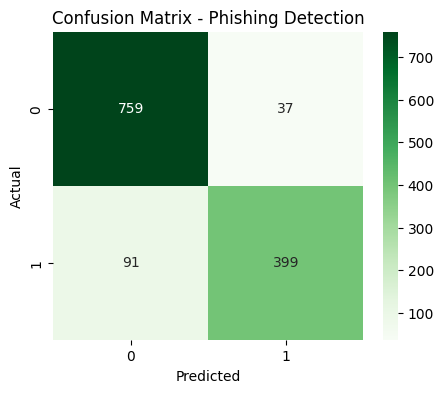

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Phishing Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
df.columns


Index(['rec_id', 'url', 'website', 'result', 'created_date'], dtype='object')

In [18]:
df.nunique()


,0
rec_id,6430
url,6429
website,6430
result,2
created_date,6200


/tmp/ipython-input-585399286.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


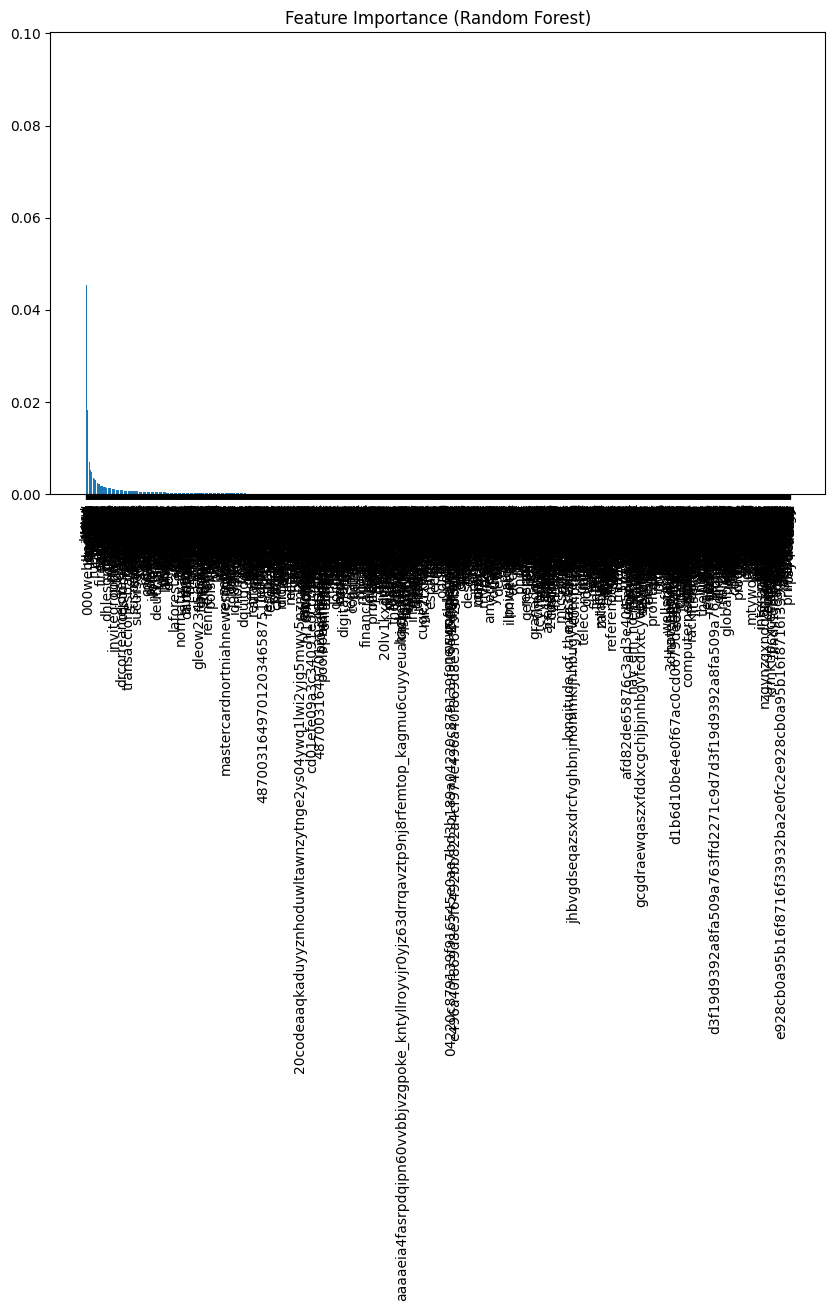

In [19]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


features = vectorizer.get_feature_names_out()


plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8919129082426127

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       796
         1.0       0.90      0.81      0.85       490

    accuracy                           0.89      1286
   macro avg       0.89      0.88      0.88      1286
weighted avg       0.89      0.89      0.89      1286



In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=10, scoring='accuracy', cv=3, random_state=42, verbose=1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:51:19] WARNING: /w

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best Score: 0.8697525551310706


In [24]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf,
    "XGBoost": xgb_model
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

comparison_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
comparison_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print(comparison_df)

                 Model  Accuracy
1        Random Forest  0.900467
0  Logistic Regression  0.898911
2              XGBoost  0.891913


In [25]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8989113530326595

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       796
         1.0       0.93      0.79      0.86       490

    accuracy                           0.90      1286
   macro avg       0.91      0.88      0.89      1286
weighted avg       0.90      0.90      0.90      1286



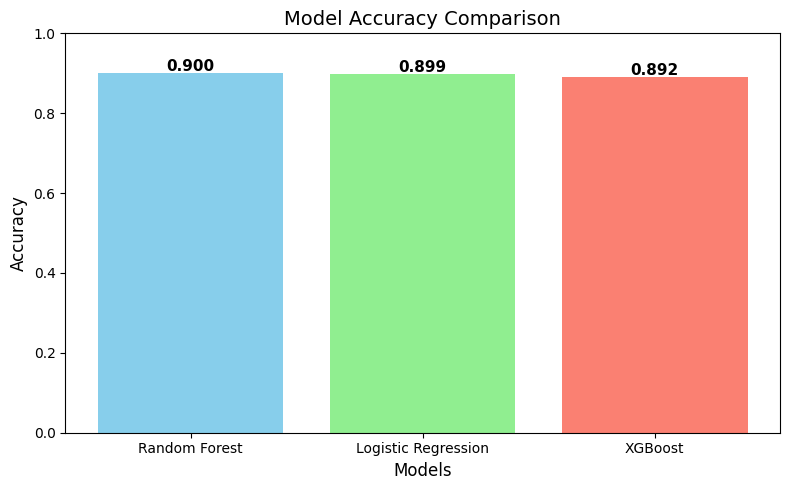

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)


for i, acc in enumerate(comparison_df["Accuracy"]):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


In [27]:
df.columns


Index(['rec_id', 'url', 'website', 'result', 'created_date'], dtype='object')

In [28]:
urls = ["http://account-paypal.verify-payments-123.com",
        "http://www.facebook.com",
        "https://www.cricbuzz.com/",

        ]
features = vectorizer.transform(urls)
predictions = rf.predict(features)

for url, label in zip(urls, predictions):
    status = "🚨 Phishing" if label == 1 else "✅ Legitimate"
    print(f"{url} → {status}")



http://account-paypal.verify-payments-123.com → 🚨 Phishing
http://www.facebook.com → ✅ Legitimate
https://www.cricbuzz.com/ → ✅ Legitimate
